# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):

\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [3]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

import ainvert

/var/folders/q6/yx4pg26j0xv45mll_l_l5sbr0000gn/T/ipykernel_20844/3238270950.py:11: RuntimeWarning: overflow encountered in scalar subtract
  return (image[I[0] + 1, I[1]] - image[I[0] - 1, I[1]]) / 2
/var/folders/q6/yx4pg26j0xv45mll_l_l5sbr0000gn/T/ipykernel_20844/3238270950.py:16: RuntimeWarning: overflow encountered in scalar subtract
  return (image[I[0] + 1, I[1] + 1] - image[I[0] - 1, I[1]] - image[I[0], I[1] - 1] + image[I[0], I[1]])/ 4
/var/folders/q6/yx4pg26j0xv45mll_l_l5sbr0000gn/T/ipykernel_20844/3238270950.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_image[y, x] = np.clip(result, 0, 255)
/var/folders/q6/yx4pg26j0xv45mll_l_l5sbr0000gn/T/ipykernel_20844/3238270950.py:16: RuntimeWarning: overflow encountered in scalar add
  return (image[I[0] + 1, I[1] + 1] - image[I[0] - 1, I[1]] - image[I[0

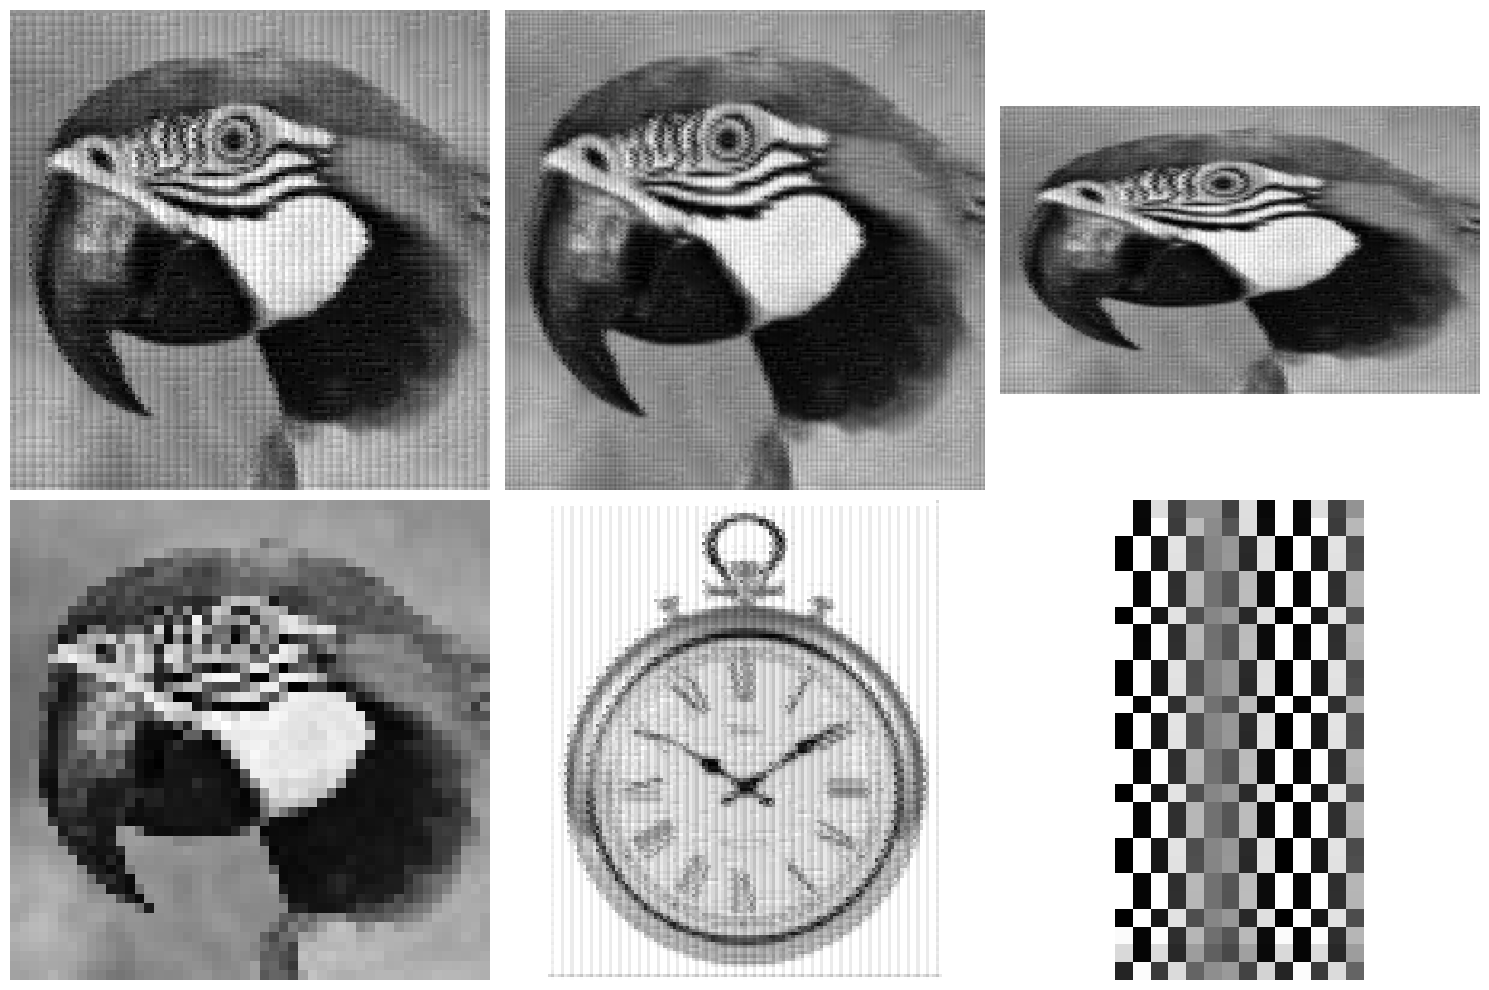

In [4]:
import math

def calculate_x_derivative(image, I, bounds):
    if I[1] + 1 > bounds[3] or I[1] - 1 < bounds[2] or I[0] :
        return image[I[0], I[1]]
    return (image[I[0], I[1] + 1] - image[I[0], I[1] - 1]) / 2

def calculate_y_derivative(image, I, bounds):
    if I[0] + 1 > bounds[1] or I[0] - 1 < bounds[0]:
        return image[I[0], I[1]]
    return (image[I[0] + 1, I[1]] - image[I[0] - 1, I[1]]) / 2

def calculate_xy_derivative(image, I, bounds): 
    if I[0] + 1 > bounds[1] or I[0] - 1 < bounds[0] or I[1] + 1 > bounds[3] or I[1] - 1 < bounds[2]:
        return image[I[0], I[1]]
    return (image[I[0] + 1, I[1] + 1] - image[I[0] - 1, I[1]] - image[I[0], I[1] - 1] + image[I[0], I[1]])/ 4



def bicubic_interpolation(image, height_scale, width_scale):
    original_height, original_width = image.shape
    new_height = math.floor(original_height * height_scale)
    new_width = math.floor(original_width * width_scale)
    new_image = np.zeros((new_height, new_width), dtype=np.uint8)
    for y in range(new_height):
        for x in range(new_width):
            orig_y = y / height_scale
            orig_x = x / width_scale
            x1 = math.floor(orig_x)
            y1 = math.floor(orig_y)
            dx = orig_x - x1
            dy = orig_y - y1
            x_vector = []
            x2 = max(0, min(x1 + 1, original_width - 1))
            y2 = max(0, min(y1 + 1, original_height - 1))
            bounds = (0, original_height - 1, 0, original_width - 1)
            A = (y1, x1)
            B = (y1, x2)
            C = (y2, x2)
            D = (y2, x1)

            points = [A, B, C, D]
            for point in points:
                x_vector.append(image[point[0], point[1]])
            for point in points:
                x_vector.append(calculate_x_derivative(image, point, bounds))
            for point in points:
                x_vector.append(calculate_y_derivative(image, point, bounds))
            for point in points:
                x_vector.append(calculate_xy_derivative(image, point, bounds))  
            a = np.dot(ainvert.A_invert, x_vector).reshape(4, 4)

            x_pow_i = np.array([1, dx, dx ** 2, dx ** 3]).reshape(1, 4)
            y_pow_i = np.array([1, dy, dy ** 2, dy ** 3]).reshape(4, 1)
            result = np.dot(np.dot(x_pow_i, a.T), y_pow_i)
            new_image[y, x] = np.clip(result, 0, 255)
    return new_image

images = [cv2.imread("parrot.bmp", cv2.IMREAD_GRAYSCALE),
          cv2.imread("clock.bmp", cv2.IMREAD_GRAYSCALE),
          cv2.imread("chessboard.bmp", cv2.IMREAD_GRAYSCALE)]

list_of_params = [(images[0], 1.5, 1.5),
            (images[0], 2.5, 2.5),
            (images[0], 1.5, 2.5),
            (images[0], 0.5, 0.5),
            (images[1], 1.5, 1.5),
            (images[2], 1.7, 0.9)]


fix, axs = plt.subplots(2, 3, figsize=(15, 10))
for index, params in enumerate(list_of_params):   
    axs[index // 3, index % 3].imshow(bicubic_interpolation(*params), cmap="gray")
    axs[index // 3, index % 3].axis("off")
plt.tight_layout()